<a href="https://colab.research.google.com/github/mukulsn/Machine-Learning/blob/main/Spacy/Spacy_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jai shree ram

# Tasks can be done from Spacy
- POS Tagging
- NER
- Sentiment Analysis
- Phrase Matching


In [2]:
import spacy

# Loading the English statistical model
model = spacy.load(
    'en_core_web_sm'
)

# Processing text and iterating over the tokens in the end
doc = model('Ram went to India on Monday')
for token in doc:
  print(token.text, token.pos_, token.dep_) # Predicting POS tags

Ram PROPN nsubj
went VERB ROOT
to ADP prep
India PROPN pobj
on ADP prep
Monday PROPN pobj


In [4]:
# Predicting Named Entities Using English Model
doc = model('Samsung buys an Asian startup for 1 billion.')

for ent in doc.ents:
  print(ent.text, ent.label_) # Predicting entities

Samsung ORG
Asian NORP
1 billion CARDINAL


In [8]:
print(spacy.explain("NORP"))
print(spacy.explain("CARDINAL"))

Nationalities or religious or political groups
Numerals that do not fall under another type


# SPACY terminology
spacy containers

1. Doc > tokens > span (group of tokens) > Example (group of Doc)

In [11]:
spacy.explain('ORTH')

In [14]:
# Importing the matcher and loading the English model
from spacy.matcher import Matcher

# Initializing the matcher with the shared vocabulary
matcher = Matcher(model.vocab)
pattern = [{'ORTH':'bought'},{'ORTH':'new'}]
matcher.add('PHONE_PATTERN', [pattern])

In [19]:
# Processing sample text and testing the Matcher

doc = model('Ram bought a new phone yesterday.')
matches = matcher(doc)
for match_id, start, end in matches:
  matched_span = doc[start:end]
  print(matched_span.text)

In [22]:
matcher(doc)

[]

In [21]:
matcher

comparing texts

In [3]:
!python -m spacy download en_core_web_md

2023-11-26 13:58:04.159723: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 13:58:04.159802: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 13:58:04.159836: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 13:58:05.443361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [26]:
# loading medium english model
model = spacy.load('en_core_web_md')
# Processing text and comparing two documents in the end
doc_1 = model('i like phones')
doc_2 = model('i like laptops')
print(doc_1.similarity(doc_2))

0.9737438292673036


In [27]:
# we can compare tokens also
doc = model('I like phones and laptops')
token_1 = doc[2]
token_2 = doc[4]
print(token_1.similarity(token_2))

0.7093489170074463


# Integrating Statistical Predictions

In [28]:
nlp

NameError: ignored

In [31]:
from spacy.matcher import Matcher
matcher = Matcher(model.vocab)

# Describing the pattern and ingesting it into the matcher
pattern = [{'LOWER':'golden'},{'LOWER':'retriever'}]
matcher.add('DOG',[pattern])
doc = model('I have a Golden Retriever')

# Running a for loop over the results of the matches
for match_id, starting, ending in matcher(doc):
  span = doc[starting:ending]
  print('matched Span : ', span.text)
  print('Root token : ',span.root.text)
  print('Root head token : ',span.root.head.text)
  print('Previous token : ', doc[starting -1].text, doc[starting - 1].pos_)

matched Span :  Golden Retriever
Root token :  Retriever
Root head token :  have
Previous token :  a DET


# Phrase Matching in spaCy
- Extremely fast!
- more efficient than matcher
- capable of doing keyword search on data

In [37]:
from spacy.matcher import PhraseMatcher
phrase_matcher = PhraseMatcher(model.vocab)

# Describing the pattern and ingesting it into the matcher
pattern = model('Golden Retriever')
phrase_matcher.add('DOG',[pattern])
doc = model('I have a Golden Retriever')

# # Iterating over the matches

for match_id, starting, ending in phrase_matcher(doc):
  span = doc[starting:ending]
  print(
      'Matched Span : ', span.text
  )

Matched Span :  Golden Retriever


In [46]:
# creating pattern doc objects
COUNTRIES = ['india','USA']
patterns = list(model.pipe(COUNTRIES))
phrase_matcher.add('COUNTRY',None,*patterns) # Adding to matcher

doc = model('hey whtas up india')
matches = matcher(doc)
print([doc[start:end] for match_id,start,end in matches])

[]


Spacy Pipeline
Text > Tokenizer > Tagger > Parser > NER.. > Doc

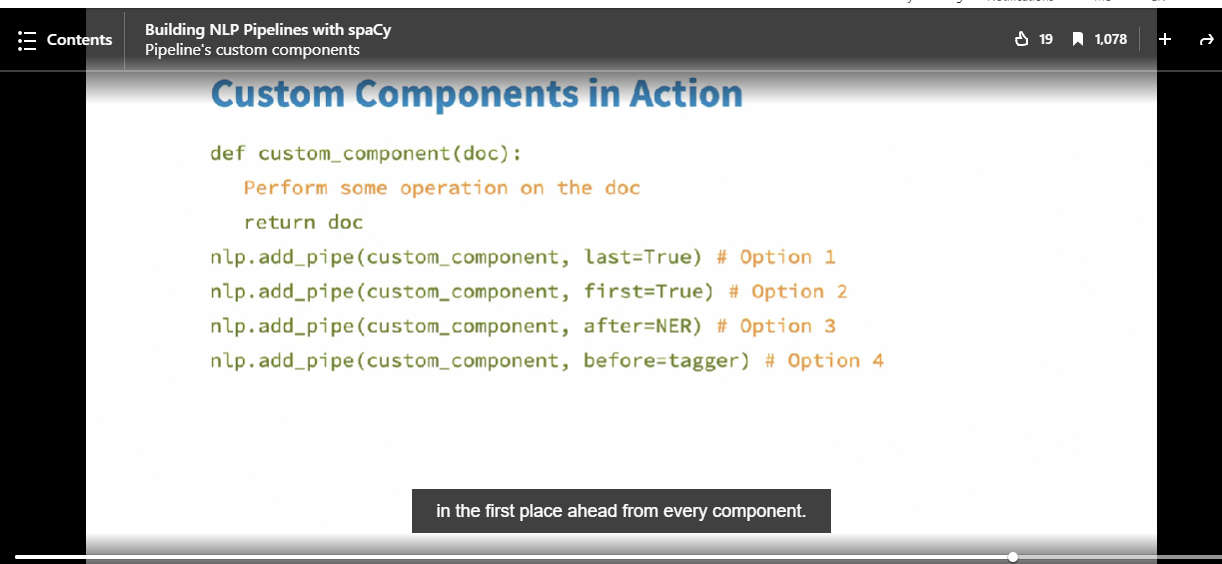

In [47]:
model.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [50]:
model.pipelines

AttributeError: ignored

In [7]:
# Property Extensions
from spacy.tokens import Token
import spacy

model = spacy.load('en_core_web_md')
def get_is_color(token):
  colors = ['red','yellow','blue']
  return token.text in colors

Token.set_extension('is_color',getter=get_is_color)
doc = model('Ram loves to bowl with the red ball.')

print(doc[6]._.is_color, '-', doc[6].text)



True - red


In [13]:
 for i in range(len(doc)):
  if doc[i]._.is_color == True:
    print(i,doc[i])

6 red


In [4]:
# Method Extensions
from spacy.tokens import Doc
def has_token1(doc, token_text): # Defining methods
  in_doc = token_text in [token.text for token in doc]
  return in_doc
Doc.set_extension('has_token1', method=has_token1)
doc = model('Ram loves to bowl with the red ball.')
print(doc._.has_token('red'),'- red')
print(doc._.has_token('ball'),'- ball')

True - red
True - ball


in Spacy NLP pipeline there are lot of
process happening in code.
for ex
tokenisation
tagger
parser
NER
etc

if we only want 1 process we can do it also on large data so to save the computing power and time

In [6]:
text_1 = "LinkedIn is the best place to expand one's network"
nlp = spacy.load('en_core_web_sm')
doc = nlp.make_doc(text_1) # Tokenising the text
print([token.text for token in doc])
print([token for token in doc])

text_2 = "LinkedIn is the best place to expand one's network."

['LinkedIn', 'is', 'the', 'best', 'place', 'to', 'expand', 'one', "'s", 'network']
[LinkedIn, is, the, best, place, to, expand, one, 's, network]


In [9]:
# Disable the tagger and parser
with nlp.disable_pipes('tagger','parser'):
  doc = nlp(text_2) # Processin the text
  print(doc.ents) # Printing the entities

(LinkedIn,)


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


To fulfull our specific domain-related problems there is a need to train customer machine learning models

In [ ]:
# training a model
# processing training data as a list containing texts and labels
for i in range(10):
  random.shuffle(TRAINING_DATA) #shuffling the training data
  for batch in spacy.util.minibatch(TRAINING_DATA):
    texts = [text for text, annotation in batch]
    annotations = [annotation for text, annotation in batch]
    nlp.update(texts, annotatins) # Updating for each batch
nlp.to_disk(path_to_model) # Saving the model

In [ ]:
# Setting up a new pipeline

nlp = spacy.blank('en') # Starting with a blank English model
ner = nlp.create_piep('ner') # Creating blank entity recognizer
nlp.add_piper(ner) # Adding it to the pipeline
nlp.add_lable("GADGET") # Adding a new lable
nlp.begin_training() # Starting the training


# training code

# Factors Affecting Training
- Quality of dataset
- Number of examples in training dataset
- Architecture of machine-learning model

# Best Practices
- Avoid overfitting, under which the model can overfit on new data, thus forgetting earlier data (Transfer Learning)
- Inlclude more examples in the training set that the model earlier `predicted correct`
- Use more `contextual datsets` for training models

In [ ]:
import random
# Importing the blank English model
nlp = spacy.blank('en')
# Creating a new entity recognizer and adding it to the pipeline
ner = nlp.create_pipe('ner')
nlp.add_pipe(ner)
# Adding the label Gadget to the entity recognizer
ner.add_label('GADGET')
nlp.begin_training() # Starting the training
for itn in range(10): # Looping for 10 iterations
  random.shuffle(TRAINING_DATA) # Shuffling
  losses = {} # Implementing batch processing
  for batch in spacy.util.minibatch(TRAINING_DATA, size=2):
    texts = [text for text, entities in batch]
    annotations = [entities for text, entities in batch]
    nlp.update(texts, annotations, losses=losses) # Updating the model
    print(losses)


# Advanced NLP Libraries
- Hugging Face
- Torch Text
- NLTK
- CoreNLP